In [1]:
import pandas as pd
import numpy as np

In [2]:
%cd /Users/alex/PETsARD

/Users/alex/PETsARD


In [3]:
import PETsARD

In [4]:
loader = PETsARD.Loader(filepath = '[NHANES] B.csv',
                                header_exist = False,
                                header_names = ['gen','age','race','edu','mar','bmi','dep','pir','gh','mets','qm','dia']
                               )
print(loader.data.head(1))

    gen   age   race       edu      mar        bmi  dep  pir   gh  mets  qm  \
0  Male  62.0  White  Graduate  Married  27.799999    0    0  0.0   0.0  Q2   

   dia  
0    1  


In [5]:
df = loader.data

In [6]:
metadata = {'metadata_col': {
                'gen': {'type': 'categorical', 'na_percentage': 0.0},
                'age': {'type': 'numerical', 'na_percentage': 0.0},
                'race': {'type': 'categorical', 'na_percentage': 0.0},
                'edu': {'type': 'categorical', 'na_percentage': 0.0},
                'mar': {'type': 'categorical', 'na_percentage': 0.0},
                'bmi': {'type': 'numerical', 'na_percentage': 0.0},
                'dep': {'type': 'categorical', 'na_percentage': 0.0},
                'pir': {'type': 'categorical', 'na_percentage': 0.0},
                'gh': {'type': 'numerical', 'na_percentage': 0.0},
                'mets': {'type': 'numerical', 'na_percentage': 0.0},
                'qm': {'type': 'categorical', 'na_percentage': 0.0},
                'dia': {'type': 'categorical', 'na_percentage': 0.0}
                },
             'metadata_global':{
                 'row_num': 4190,
                 'col_num': 12,
                 'na_percentage': 0.0
                }
            }

In [7]:
pm = PETsARD.HyperProcessor(metadata)

In [8]:
from PETsARD.Processor.Missingist import Missingist_Mean, Missingist_Drop
from PETsARD.Processor.Outlierist import Outlierist_IsolationForest

In [9]:
config_1 = {'missingist': {'gen': Missingist_Drop(),
  'age': Missingist_Mean()},
 'outlierist': {'gen': Outlierist_IsolationForest(),
  'age': None}}

In [10]:
pm.update_config(config_1)

In [11]:
pm._config

{'missingist': {'gen': <PETsARD.Processor.Missingist.Missingist_Drop at 0x14f50ae00>,
  'age': <PETsARD.Processor.Missingist.Missingist_Mean at 0x14f50a770>,
  'race': <PETsARD.Processor.Missingist.Missingist_Drop at 0x14f3bffd0>,
  'edu': <PETsARD.Processor.Missingist.Missingist_Drop at 0x14f3bf880>,
  'mar': <PETsARD.Processor.Missingist.Missingist_Drop at 0x14f3bf2b0>,
  'bmi': <PETsARD.Processor.Missingist.Missingist_Mean at 0x14f3be8c0>,
  'dep': <PETsARD.Processor.Missingist.Missingist_Drop at 0x14f509720>,
  'pir': <PETsARD.Processor.Missingist.Missingist_Drop at 0x14f509810>,
  'gh': <PETsARD.Processor.Missingist.Missingist_Mean at 0x14f5098a0>,
  'mets': <PETsARD.Processor.Missingist.Missingist_Mean at 0x14f50b2b0>,
  'qm': <PETsARD.Processor.Missingist.Missingist_Drop at 0x14f50b0a0>,
  'dia': <PETsARD.Processor.Missingist.Missingist_Drop at 0x14f3beb30>},
 'outlierist': {'gen': <PETsARD.Processor.Outlierist.Outlierist_IsolationForest at 0x14f3bee30>,
  'age': None,
  'race':

In [12]:
pm.fit(df, ['missingist', 'encoder', 'scaler', 'outlierist'])

In [13]:
df

,gen,age,race,edu,mar,bmi,dep,pir,gh,mets,qm,dia
0,Male,62.0,White,Graduate,Married,27.799999,0,0,0.0,0.0,Q2,1
1,Male,53.0,White,HighSchool,Divorced,30.799999,0,1,0.0,0.0,Q1,0
2,Male,78.0,White,HighSchool,Married,28.799999,0,0,0.0,0.0,Q3,1
3,Female,56.0,White,Graduate,Parther,42.400002,1,0,0.0,0.0,Q3,0
4,Female,42.0,Black,College,Divorced,20.299999,1,0,0.0,0.0,Q4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4185,Male,25.0,Other,Graduate,Never,21.000000,0,0,0.0,0.0,Q1,0
4186,Female,76.0,White,HighSchool,Widowed,21.500000,1,0,0.0,0.0,Q1,0
4187,Female,80.0,White,College,Widowed,31.000000,0,0,0.0,0.0,Q1,0
4188,Male,35.0,White,9th,Married,26.000000,0,1,0.0,0.0,Q1,0


In [14]:
df_transformed = pm.transform(df)

In [15]:
df_transformed

,gen,age,race,edu,mar,bmi,dep,pir,gh,mets,qm,dia
0,0.461755,1.204581,0.569176,0.987197,0.990647,-0.085255,0.652080,0.503134,0.0,0.0,0.085725,0.650366
1,0.933184,0.309986,0.487974,0.633546,0.739556,0.644658,0.257424,0.397695,0.0,0.0,0.812429,0.819942
2,0.928015,-0.249136,0.256589,0.366972,0.804597,-0.231238,0.429267,0.576583,0.0,0.0,0.972724,0.523994
3,0.708487,-0.305049,0.788928,0.947487,0.636265,-0.742177,0.739320,0.332619,0.0,0.0,0.870131,0.494141
4,0.254588,-1.143732,0.864192,0.148237,0.802990,-0.377220,0.658895,0.246165,0.0,0.0,0.750312,0.632056
...,...,...,...,...,...,...,...,...,...,...,...,...
2286,0.729127,-0.920083,0.514399,0.339431,0.017268,0.250505,0.759614,0.198912,0.0,0.0,0.780620,0.699141
2287,0.939488,0.142249,0.574365,0.999460,0.194468,0.411086,0.638900,0.927766,0.0,0.0,0.718595,0.886337
2288,0.616471,-1.423293,0.792312,0.334683,0.654037,-1.194723,0.318317,0.639093,0.0,0.0,0.044348,0.159584
2289,0.721903,-0.864171,0.071902,0.868263,0.367552,-0.464810,0.488738,0.947440,0.0,0.0,0.184799,0.642714


In [16]:
df_inverse = pm.inverse_transform(df_transformed)

In [17]:
df_inverse

,gen,age,race,edu,mar,bmi,dep,pir,gh,mets,qm,dia
0,Female,72.0,Mexican,11th,Separated,28.600000,0,0,0.0,0.0,Q1,0
1,Male,56.0,Black,HighSchool,Divorced,33.599998,0,0,0.0,0.0,Q3,1
2,Male,46.0,White,Graduate,Parther,27.600000,0,0,0.0,0.0,Q3,0
3,Male,45.0,Other,11th,Never,24.100000,0,0,0.0,0.0,Q3,0
4,Female,30.0,Hispanic,College,Parther,26.600000,0,0,0.0,0.0,Q4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2286,Male,34.0,Black,Graduate,Married,30.900000,0,0,0.0,0.0,Q3,0
2287,Male,53.0,Mexican,11th,Married,32.000000,0,1,0.0,0.0,Q4,1
2288,Male,25.0,Other,Graduate,Never,21.000000,0,0,0.0,0.0,Q1,0
2289,Male,35.0,White,9th,Married,26.000000,0,1,0.0,0.0,Q1,0


In [18]:
(df_inverse == df).all()

ValueError: Can only compare identically-labeled (both index and columns) DataFrame objects

In [ ]:
np.isclose(df_inverse.age, df.age).all()

True

In [ ]:
np.isclose(df_inverse.bmi, df.bmi).all()

True

In [74]:
salaries = pd.read_csv('salaries.csv')

In [75]:
from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer

In [76]:
st_md = SingleTableMetadata()
st_md.detect_from_dataframe(salaries)

In [77]:
syn = GaussianCopulaSynthesizer(st_md)

In [78]:
syn.fit(salaries)

In [79]:
sdata = syn.sample(salaries.shape[0])

/Users/alex/miniforge3/envs/py310/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:701: RuntimeWarning: invalid value encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


In [80]:
import seaborn as sns

In [81]:
salaries.shape[0]

10417

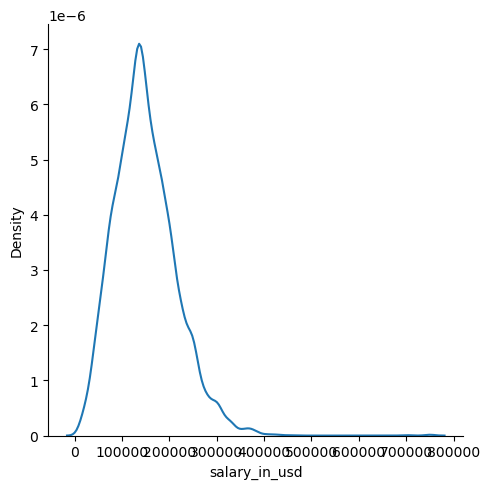

In [82]:
sns.displot(salaries.salary_in_usd, kind='kde')

In [83]:
sdf = pd.DataFrame({'source': ['original'] * 10417 + ['synthesized'] * 10417, 'salary': pd.concat([salaries.salary_in_usd, sdata.salary_in_usd], axis=0)})

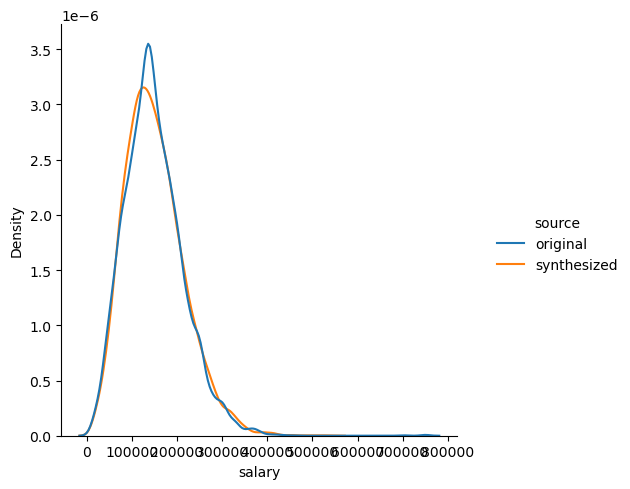

In [99]:
sns.displot(sdf, x='salary', hue='source', kind='kde')

In [85]:
salaries_log = salaries.copy()

In [86]:
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [87]:
salaries_log.loc[:, 'salary'] = salaries_log.salary.apply(np.log)
salaries_log.loc[:, 'salary_in_usd'] = salaries_log.salary_in_usd.apply(np.log)

In [88]:
st_md2 = SingleTableMetadata()
st_md2.detect_from_dataframe(salaries_log)

In [89]:
syn2 = GaussianCopulaSynthesizer(st_md2)

In [90]:
syn2.fit(salaries_log)

In [91]:
sdata2 = syn.sample(salaries_log.shape[0])

/Users/alex/miniforge3/envs/py310/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:701: RuntimeWarning: invalid value encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


In [95]:
sdata2.loc[:, 'salary'] = sdata2.salary.apply(np.exp)
sdata2.loc[:, 'salary_in_usd'] = sdata2.salary_in_usd.apply(np.exp)

In [96]:
sdf2 = pd.DataFrame({'source': ['original'] * 10417 + ['synthesized'] * 10417, 'salary': pd.concat([salaries.salary_in_usd, sdata2.salary_in_usd], axis=0)})

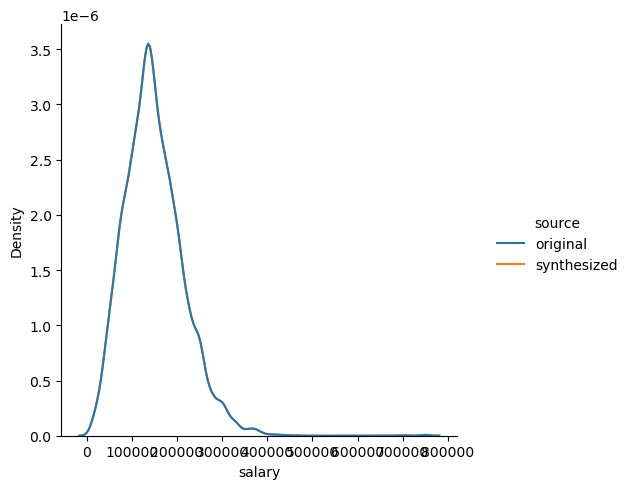

In [106]:
sns.displot(sdf2, x='salary', hue='source', kind='kde')